# Lab 6. Natural Language Processing
# Task 6.1 Sentiment Analysis
## Problem Descriptions
Sentiment analysis aims to detect whether the overall sentiments of text are positive or negative. In this task, we need to build a Naive Bayes classifier for sentiment prediction of movie reviews using the "movie_review" dataset. The problem can be formulated as follows:

1. Data collection: Import the "movie_review" dataset, in which texts are
   labelled with positive or negative.
 *   Positive: “the movie is great”
 *   Negative: “mediocre performance by most actors”

2. Split the data into 80% training set and 20% testing set.

3. Data preprocessing:
 * Tokenization: Split the word of movie review into individual token
 * Removing stopword: Remove word that doesn't contribute to overall
   sentiment of the movie review such as "is", "may","the".
 * Convert all words into lowercase to ensure uniformity.
 * Stemming or lemmatization: Reduces word of "movie_review" to their root
   form.

4. Extract the word count features: Convert the processed "movie_review" dataset into a Bag-of-word representation, so that it is suitable for the machine learning model. Either word count feature extraction approach is implemented.
 *  tf feature: tf stands for term frequency, it counts how often a vocabulary is present in the document.
          tf(t,d)=count of term t in the document (movie review sentences)
                  /total number of words in the document d (movie review sentences).
 *  Extract td-idf feature: A word with a high tf-idf score means that the word is specific to the particular movie review sentence but not common in the entire dataset. tf-idf score can be calculated by using the formula below.
                
          idf(t,D)=log[(total number of movie review sentences in "movie_review" dataset D)]
                   /(number of movie review sentences containing term t)  
                 
          tfidf(t,d,D)=tf(t,d)*idf(t,D)
             
4. Build the Naïve Bayes classifier from the training set
 * In this case, multinomial Naive Bayes model is used because it is suitable for modelling discrete data.

5. Apply the classifier on testing data set to classify new sentences of movie review into positive or negative.    

6. Evaluate the performance of the model in handling testing data by using metrics like accuracy, precision, recall, F1-score, and confusion matrices.

##Implementation and Results


In [ ]:
!pip install nltk
import nltk
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
  raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
  raw_data.append(movie_reviews.raw(fileids_neg[i]))

# The corresponding labels for the reviews, 0 for postive, 1 for negative
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)

# Split the training and testing set by 80-20%
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
# Calculate the tf-idf features from the training set
tfidf = TfidfVectorizer(use_idf=False)
tfidf_data = tfidf.fit_transform(X_train)
print(tfidf_data.shape)

# Train the naive Bayes model for prediction
classifier = MultinomialNB().fit(tfidf_data, Y_train)

(1600, 36272)


In [ ]:
# Performance on the testing set
testing_tfidf = tfidf.transform(X_test)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

              precision    recall  f1-score   support

         pos       0.91      0.69      0.78       195
         neg       0.76      0.93      0.84       205

    accuracy                           0.81       400
   macro avg       0.83      0.81      0.81       400
weighted avg       0.83      0.81      0.81       400



In [ ]:
print(X_train[0])
print(testing_tfidf[0])

i saw simon birch in a basically sold out theater , on a sunday afternoon . 
when the movie was over and the audience was exiting , i didn't hear one negative comment , and i didn't have any to offer . 
simon birch is primarily about the friendship of two twelve year old boys , simon ( ian michael smith ) and joe ( joseph mazzello ) , and what destiny holds for both of them . 
simon is a dwarf , who was not supposed to last through the night after birth due to a weak heart . 
surprisingly , he does , and now constantly reminds everyone that he is a living miracle . 
simon thinks god has a plan for him , a purpose for his life , and his condition , he just doesn't know what . 
joe is an illegitimate child ( referred to both comically and dramatically throughout the film as a bastard ) , who's mom ( ashley judd ) won't tell him who his father is . 
simon has more than just dwarfism as a problem , the people in the town don't really like him , because he isn't " natural " . 
even his own 

(-1.0, 1.0)

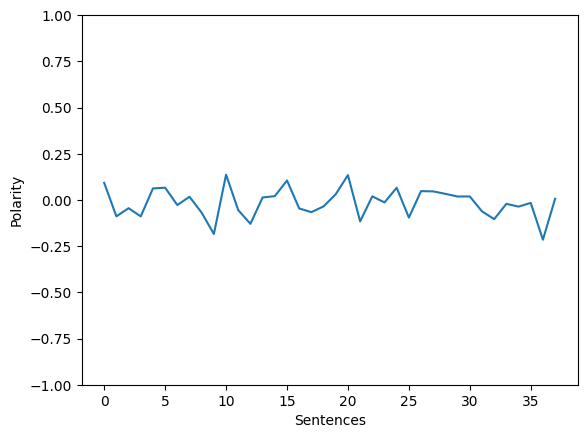

In [ ]:
# Evaluate the sentiment for each sentence in a review, and plot the variation of sentiment
import matplotlib.pyplot as plt

sentences = X_test[0].split('.')

testing_tfidf = tfidf.transform(sentences)
predictions = classifier.predict_proba(testing_tfidf)
polarity = [x[0] - x[1] for x in predictions]
# polarity = [x[0] if (x[0] > x[1]) else -x[1] for x in predictions]

plt.xlabel('Sentences')
plt.ylabel('Polarity')
plt.plot(polarity)
plt.ylim(-1, 1)

##Discussion
The performance of the multinomial Naive Bayes model is measured in terms of precision, recall, f1 score, support, accuracy, macro average, and weighted average.

Precision: Proportion of true prediction out of all predictions made.

Recall: Proportion of true prediction out of all actual classes (positive, negative).

F1 score: Mean of precision and recall.

Support: Number of instances of actual positive and negative class.

Accuracy: Proportion of the total number of positive and negative predictions that were made correctly.

Macro average: Average precision, recall, and F1-score of the model without considering the imbalance of actual positive and negative classes.

Weighted average: Average precision, recall, and F1-score of the model  considering imbalance of actual positive and negative class.

###Using tf-idf features


![picture](https://github.com/mengheng02/image-file/blob/main/polarity%20plot%20for%20td-idf%20feature.png?raw=true)
      
                  precision    recall  f1-score   support
     pos             0.89      0.56      0.69       216
     neg             0.64      0.92      0.76       184

    accuracy                             0.73       400
    macro avg        0.77      0.74      0.72       400
    weighted avg     0.78      0.73      0.72       400

By observing the polarity plot, most polarity scores are below 0 across the number of sentences and the sentiment appears to oscillate between neutral and negative. The plot doesn't show a clear pattern towards positive or negative, hence suggesting a neutral sentiment with few negative elements.

From the performance table, 89% of texts are correctly labelled as positive (true positive) in all positive predictions made while 64% of the texts are correctly labelled as negative (true negative) in all negative predictions made. The model correctly identified 56% of all actual positive texts and 92% of all actual negative texts. This model obtained an F1-score of 69% for positive prediction and 76% for negative prediction. There are 216 actual positive texts and 184 actual negative texts in the dataset. The overall accuracy of this model is 73%.

Combining performance table with sentiment polarity plot, the model is better at capturing negative instances than positive instances while worse at predicting correct label for actual negative instances than positive instances. Given the overall negative trend on the polarity plot, the model tend to rate sentences more negatively than they are. Although it captures most of the negative instances, it predicts some non-negative text as negative. Hence, this model still required improvement in identifying true positive instance and reducing false negative when predicting negative instance.

###Using tf features
![picture](https://github.com/mengheng02/image-file/blob/main/polarity%20plot%20using%20tf%20feature.png?raw=true)


                precision   recall  f1-score   support

         pos       0.91      0.69      0.78       195
         neg       0.76      0.93      0.84       205

    accuracy                           0.81       400
    macro avg      0.83      0.81      0.81       400
    weighted avg   0.83      0.81      0.81       400

The resulting polarity plot by the model using the tf feature shows less variance than that of using the tf-idf feature. This could be due to the tf model rating all terms equally without considering their document frequency.

When switching from tf-idf features to tf features, the accuracy has been increased from 73% to 81%, the precision for true positive prediction has been increased from 89% to 91% for the positive class has also increased from 56% to 69%, thus resulting in a higher F1-score. The F1-score increased from 69% to 78% for the positive class, and from 76% to 84% for the negative class.

From the performance metrics and polarity plot, we could infer that the model with the tf feature is better at the sentiment analysis task than the model using the tf-idf feature. The potential reason might be the nature of the text data in the "movie review" dataset or the domain from which the data is drawn.




